<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/Manual_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/Mohammadkaviany/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 55 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

--2022-11-11 13:33:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32717 (32K) [application/x-httpd-php]
Saving to: ‘Real estate valuation data set.xlsx’

Real estate valuati 100%[===================>]  31.95K  --.-KB/s    in 0.07s   

2022-11-11 13:33:15 (487 KB/s) - ‘Real estate valuation data set.xlsx’ saved [32717/32717]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")


In [ ]:
df = df.sort_values("X2 house age")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
166,167,2013.416667,0.0,292.99780,6,24.97744,121.54458,73.6
103,104,2012.750000,0.0,208.39050,6,24.95618,121.53844,45.7
373,374,2013.083333,0.0,274.01440,1,24.97480,121.53059,52.2
105,106,2012.833333,0.0,292.99780,6,24.97744,121.54458,71.0
123,124,2013.416667,0.0,185.42960,0,24.97110,121.53170,45.5
...,...,...,...,...,...,...,...,...
128,129,2013.083333,41.3,124.99120,6,24.96674,121.54039,60.7
173,174,2013.083333,41.3,401.88070,4,24.98326,121.54460,35.1
361,362,2013.083333,41.4,281.20500,8,24.97345,121.54093,63.3
392,393,2013.083333,42.7,443.80200,6,24.97927,121.53874,35.3


In [ ]:
df = df.sort_values("X2 house age")
#df.tail(30)

In [73]:
x = df["X2 house age"][0:150]
y = df["Y house price of unit area"][0:150]

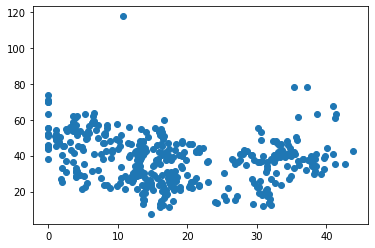

In [ ]:
plt.scatter(x, y)

In [ ]:
x = np.sort(np.array(x))
y = np.sort(np.array(y))

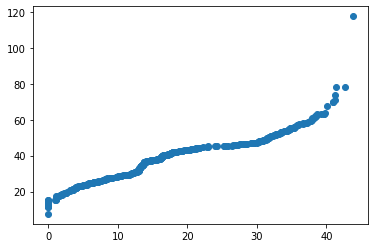

In [ ]:
plt.scatter(x, y)

In [ ]:
x

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

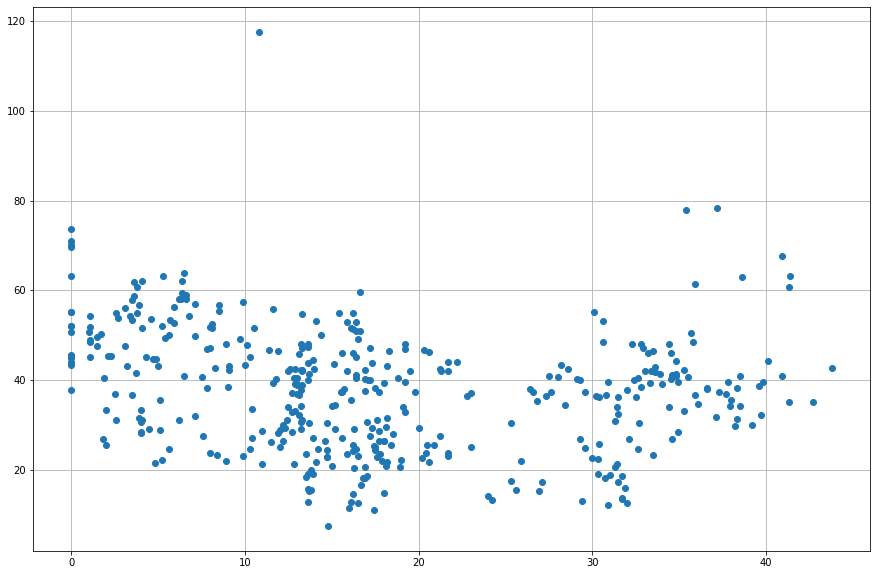

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, "o")
plt.grid()
plt.show

In [ ]:
def line(theta0, theta1, X):

  h = np.array ( theta0 + (theta1 * X) )
  
  return h

#Gredient Descent

In [ ]:
def error(theta0, theta1, X):
  
  E  = 0.5 * sum( (line(theta0, theta1, X) - y)**2 )

  return E

In [ ]:
def diff_E(theta0, theta1, X):
  
  dE = sum((line(theta0, theta1, X) - y))

  return dE

In [ ]:
B0, B1 = np.random.rand(), np.random.rand()

3.3844211208470623


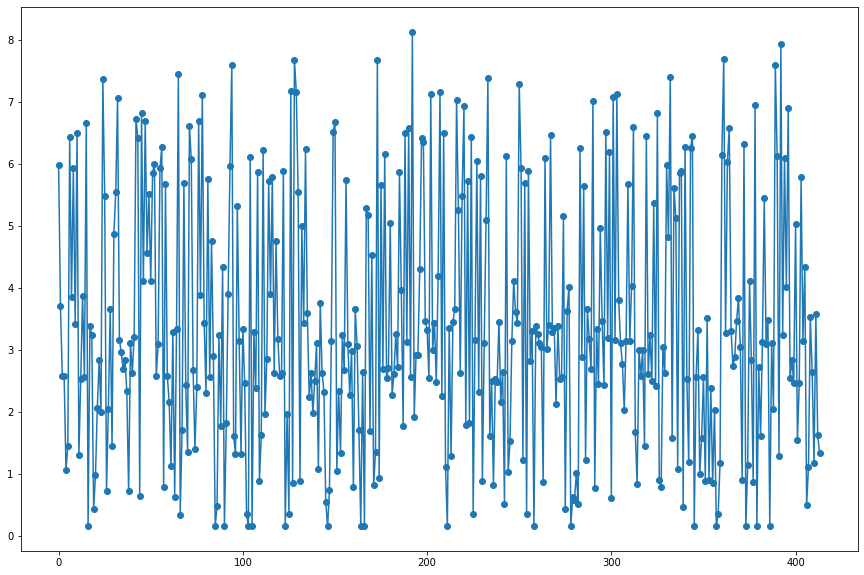

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(line(B0, B1, x), "-o")
print(np.mean(line(B0, B1, x)))
plt.show()

In [41]:
#  1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, # , 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000

alpha  = [ 1e-6, 1e-5, 1e-4]
steps  = []
theta0 = []
theta1 = []

for i in alpha:
  B0, B1 = np.random.rand(), np.random.rand()
  iter = 0
  dx = 0.000001
  dE = diff_E(B0, B1, x)
  
  while (abs(dE) > dx) and (iter < 10000) :
    
    B0_new = B0 - (i * (diff_E(B0, B1, x)))
    B1_new = B1 - (i * (diff_E(B0, B1, x)))
    
    dE = diff_E(B0_new, B1_new, x)

    B0 = B0_new
    B1 = B1_new
    
    iter += 1

  steps.append(iter)

  theta0.append(B0)
  theta1.append(B1)

  print(i, iter)

Thetas = list(zip(theta0, theta1))
print(Thetas)

1e-06 2937
1e-05 291
0.0001 16
[(1.6489458423368233, 2.0511572917332757), (2.274537265694105, 2.0158382068810288), (2.604672695503022, 1.9971997140928681)]


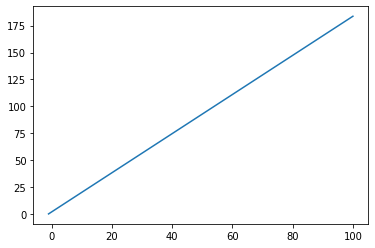

In [56]:
x = np.linspace(-1, 100, 200)
y = 2.04169 + 1.816538 * x
plt.plot(x, y)
plt.show()

Minimum : 16 
Index of Min Steps : 8 
Value of a for min steps : 0.0001

theta0 is :1.7690140419537639
theta1 is :2.0443785880530987


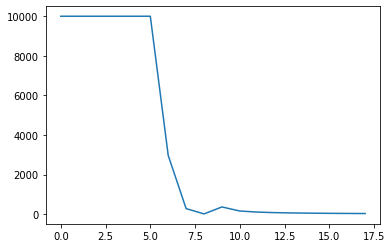

In [34]:

print(f"Minimum : {min(steps)} \nIndex of Min Steps : {steps.index(min(steps))} \nValue of a for min steps : {alpha[steps.index(min(steps))]}\n")
print(f"theta0 is :{(Thetas[steps.index(min(steps))])[0]}\ntheta1 is :{(Thetas[steps.index(min(steps))])[1]}")
plt.plot(steps)


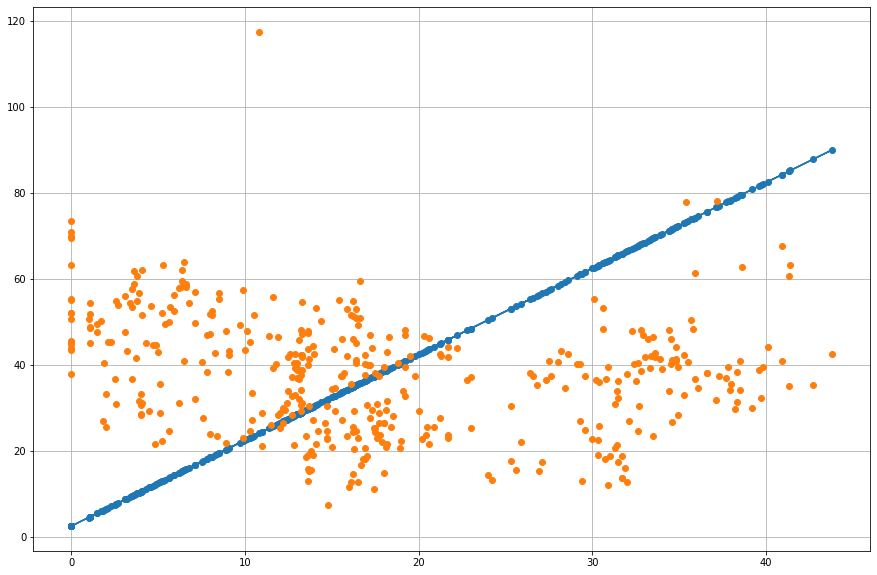

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(x, line((Thetas[steps.index(min(steps))])[0], (Thetas[steps.index(min(steps))])[1], x), '-o')
plt.plot(x, y, "o")
plt.grid()
plt.show()

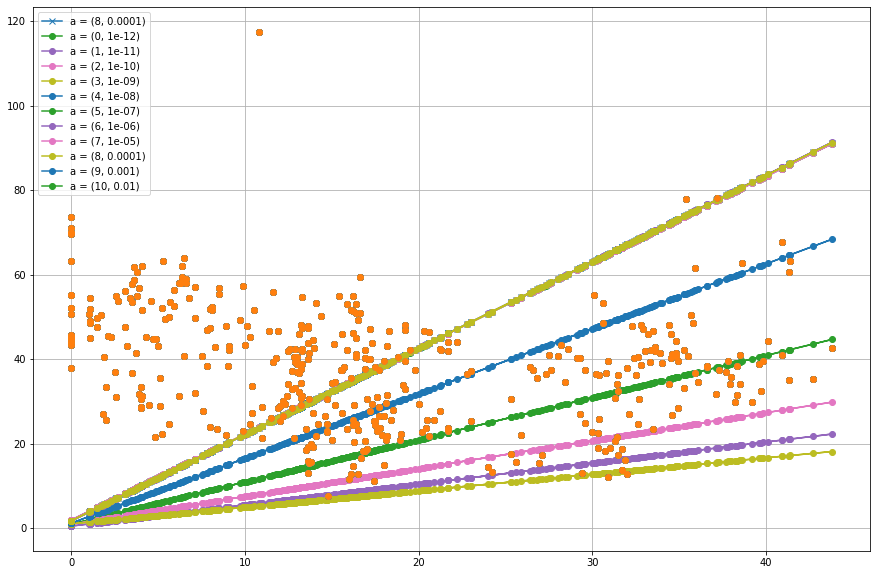

In [36]:
plt.figure(figsize=(15, 10))
plt.plot(x, line( (Thetas[8][0]), (Thetas[8][1]), x), '-x', label= f"a = {8, alpha[8]}")


for i in range(len(Thetas)-7):
  plt.plot(x, y, "o")
  plt.plot(x, line( (Thetas[i][0]), (Thetas[i][1]), x), '-o', label= f"a = {i, alpha[i]}")
  plt.grid()
  plt.legend()
  plt.plot()


---------------------------------

In [46]:
from tqdm import tqdm

In [88]:
x = [2, 4, 5]
y = [1.2, 2.8, 5.3]

In [102]:
x = df['X2 house age']
y = df["Y house price of unit area"]

In [164]:
B0, B1 = 0, 1  #np.random.rand(), np.random.rand()
lr =  1e-7
Error_list = []

for itr in tqdm(range(10)):
  error_cost = 0
  cost_B0    = 0
  cost_B1    = 0

  for i in range(len(x)):
    y_pred = B0 + (B1 * x[i])

    error_cost += (y[i] - y_pred) ** 2
    #print(error_cost)
    for j in range(len(x)):
      diff_B0 = -2 * (y[j] - (B0 + B1 * x[j]))
      diff_B1 = (-2 * x[j]) * (y[j] - (B0 + B1 * x[j]))

      cost_B0 += diff_B0
      cost_B1 += diff_B1
    
    B0 -= lr * cost_B0
    B1 -= lr * cost_B1
  Error_list.append(error_cost)
  '''if error_cost < 10:
    Error_list.append(error_cost)
    print(B0, B1)
    break'''

100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


In [165]:
Error_list

[192688.02540112686,
 89133.79711140686,
 80724.82694256512,
 72728.31341863336,
 73923.34454698769,
 72822.60208434811,
 73220.75100513198,
 73008.12454939894,
 73102.58606219292,
 73056.71528611821]

In [166]:
B0

42.42040847983379

In [167]:
B1

-0.25134940879638135

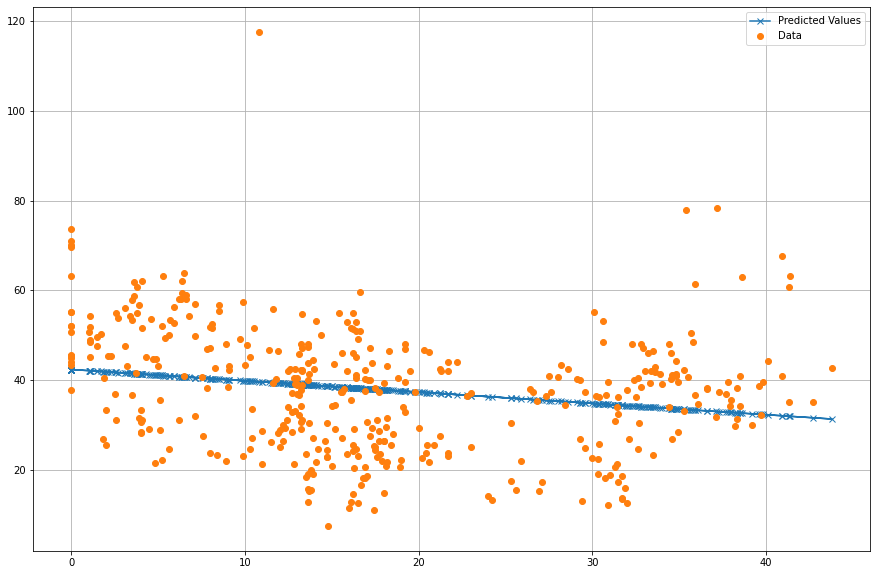

In [168]:
plt.figure(figsize=(15, 10))
plt.plot(x, line(B0, B1, x), '-x', label = "Predicted Values")
plt.plot(x, y, 'o', label= "Data")
plt.legend()
plt.grid()